In [2]:
!pip install tensorflow


  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached h5py-3.12.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.5 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-macosx_10_9_universal2.whl.metadata (20 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 MB 4.4 MB/s eta 0:00:0000:0100:02
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Usi

In [3]:
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader,TensorDataset

In [5]:
data=tf.keras.datasets.fashion_mnist

In [7]:
(train_images,train_labels),(valid_images,valid_labels)=data.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step 
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
train_images = train_images.clone().detach().float() / 255.0
valid_images = valid_images.clone().detach().float() / 255.0
train_labels = train_labels.clone().detach().long()
valid_labels = valid_labels.clone().detach().long()


In [12]:
train_images = train_images.unsqueeze(1)  # (batch, 1, 28, 28)
valid_images = valid_images.unsqueeze(1)

In [14]:
train_dataset=TensorDataset(train_images,train_labels)
valid_dataset=TensorDataset(valid_images,valid_labels)
train_loader=DataLoader(train_dataset,batch_size=64,shuffle=True)
valid_loader=DataLoader(valid_dataset,batch_size=64,shuffle=False)

In [15]:
categories = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

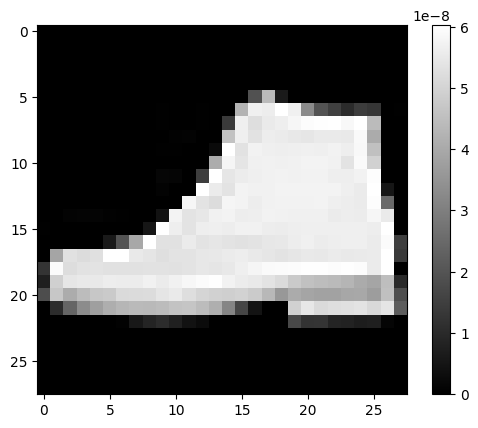

Correct answer: Ankle boot


In [16]:
data_idx = 42
image, label = train_dataset[data_idx]
plt.figure()
plt.imshow(image.squeeze(), cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()
print(f"Correct answer: {categories[label]}")

In [17]:
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.flatten=nn.Flatten()
        self.fc=nn.Linear(28*28,10)
    def forward(self,x):
        x=self.flatten(x)
        x=self.fc(x)
        return x
model=Model()
print(model)
        

Model(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=784, out_features=10, bias=True)
)


In [18]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)


Epoch 1/50, Loss: 2.3026, Accuracy: 0.0999
Epoch 2/50, Loss: 2.3027, Accuracy: 0.0984
Epoch 3/50, Loss: 2.3026, Accuracy: 0.1006
Epoch 4/50, Loss: 2.3026, Accuracy: 0.1006
Epoch 5/50, Loss: 2.3026, Accuracy: 0.0999
Epoch 6/50, Loss: 2.3027, Accuracy: 0.0987
Epoch 7/50, Loss: 2.3026, Accuracy: 0.1005
Epoch 8/50, Loss: 2.3026, Accuracy: 0.0981
Epoch 9/50, Loss: 2.3027, Accuracy: 0.0989
Epoch 10/50, Loss: 2.3026, Accuracy: 0.1006
Epoch 11/50, Loss: 2.3026, Accuracy: 0.0986
Epoch 12/50, Loss: 2.3026, Accuracy: 0.1014
Epoch 13/50, Loss: 2.3026, Accuracy: 0.1002
Epoch 14/50, Loss: 2.3026, Accuracy: 0.0994
Epoch 15/50, Loss: 2.3027, Accuracy: 0.1006
Epoch 16/50, Loss: 2.3026, Accuracy: 0.1004
Epoch 17/50, Loss: 2.3027, Accuracy: 0.0996
Epoch 18/50, Loss: 2.3026, Accuracy: 0.1004
Epoch 19/50, Loss: 2.3026, Accuracy: 0.0966
Epoch 20/50, Loss: 2.3026, Accuracy: 0.0979
Epoch 21/50, Loss: 2.3026, Accuracy: 0.0985
Epoch 22/50, Loss: 2.3026, Accuracy: 0.0998
Epoch 23/50, Loss: 2.3026, Accuracy: 0.10

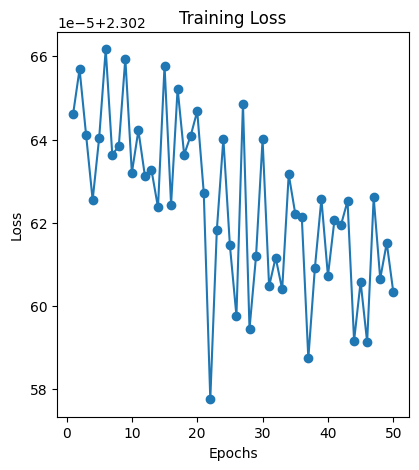

In [34]:
import torch
import matplotlib.pyplot as plt

def train_model(model, train_loader, criterion, optimizer, epochs=50, device='cpu'):
    
    model.to(device)
    
    losses = []
    accuracies = []

    for epoch in range(epochs):
        correct = 0
        total = 0
        epoch_loss = 0

        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)  
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        avg_loss = epoch_loss / len(train_loader)
        accuracy = correct / total

        losses.append(avg_loss)
        accuracies.append(accuracy)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

   
    plt.figure(figsize=(10, 5))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs+1), losses, marker='o', linestyle='-')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss")




train_model(model, train_loader, criterion, optimizer, epochs=50)
